We have a data about the customers who visit a mall. Based on the data, we will try to find out ways to improve profits.

We load data, look for cleaning possibilities, and study the structure of the data.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_csv("../input/shopping-data/shopping-data.csv")

df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [2]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [3]:
df=df.drop_duplicates()

df.isnull().sum()

df.dtypes

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

Let us plot the data to see where the most of our customers fit, on different aspects.

In [4]:
a=["Age","Annual Income (k$)","Spending Score (1-100)"]

count    200.000000
mean      38.850000
std       13.969007
min       18.000000
25%       28.750000
50%       36.000000
75%       49.000000
max       70.000000
Name: Age, dtype: float64
0.48556885096681657


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


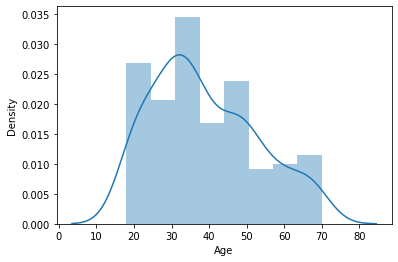

count    200.000000
mean      60.560000
std       26.264721
min       15.000000
25%       41.500000
50%       61.500000
75%       78.000000
max      137.000000
Name: Annual Income (k$), dtype: float64
0.3218425498619055


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


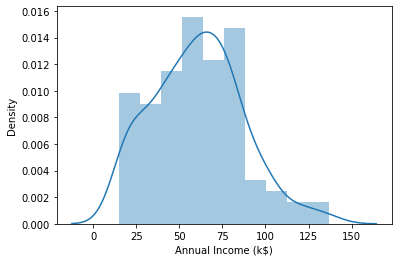

count    200.000000
mean      50.200000
std       25.823522
min        1.000000
25%       34.750000
50%       50.000000
75%       73.000000
max       99.000000
Name: Spending Score (1-100), dtype: float64
-0.047220201374263374


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


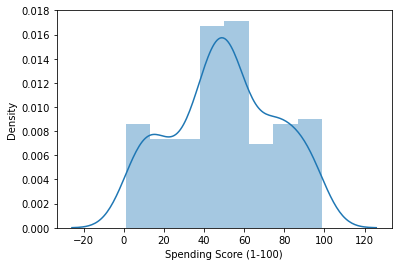

In [5]:
for i in a:
    print(df[i].describe())
    print(df[i].skew())
    sns.distplot(df[i])
    plt.show()

Let us plot to see the frequent gender in malls.

<AxesSubplot:xlabel='Genre', ylabel='count'>

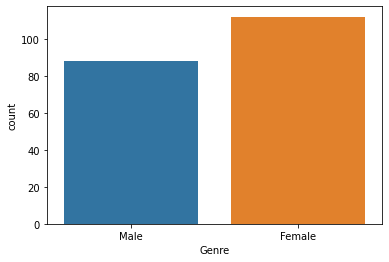

In [6]:
sns.countplot(x="Genre",data=df)

Now we prepare data, and model it. Then we find the right number of culsters and identify them.

In [7]:
data=df.iloc[:,3:5]

In [8]:
data.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [9]:
from sklearn.cluster import KMeans
algo=KMeans(n_clusters=2)
algo.fit(data)

cen=algo.cluster_centers_

algo.labels_

algo.inertia_

181363.59595959607

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

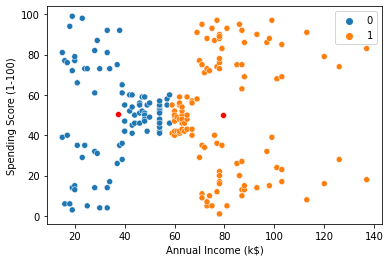

In [10]:
sns.scatterplot(data['Annual Income (k$)'],data['Spending Score (1-100)'],hue=algo.labels_)
sns.scatterplot(cen[:,0],cen[:,1],color='r')

In [11]:
dis=[]
k=range(1,15)
for i in k:
    algo=KMeans(n_clusters=i)
    algo.fit(data)
    dis.append(algo.inertia_)
dis

[269981.28000000014,
 181363.59595959607,
 106348.37306211119,
 73679.78903948837,
 44448.45544793369,
 37233.81451071002,
 30227.60651315203,
 24986.52564064289,
 21818.11458845217,
 19740.7240824393,
 17508.97057740007,
 16281.052318488362,
 14269.358658008663,
 13095.871751652356]

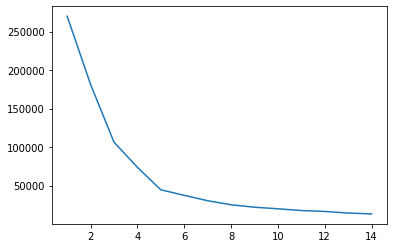

In [12]:
plt.plot(k,dis)
plt.show()

In [13]:
algo1=KMeans(n_clusters=5)
algo1.fit(data)
cen=algo1.cluster_centers_
cen

array([[55.2962963 , 49.51851852],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636],
       [86.53846154, 82.12820513]])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

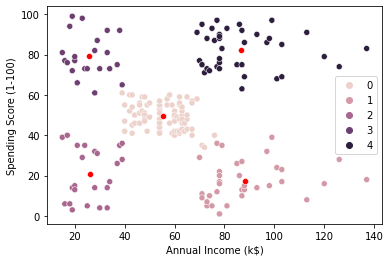

In [14]:
sns.scatterplot(data['Annual Income (k$)'],data['Spending Score (1-100)'],hue=algo1.labels_)
sns.scatterplot(cen[:,0],cen[:,1],color='r')

Here we have identified 5 clusters, and we can target them based on their charectoristics.
TThey are :0,1,2,3,4.

0: They have average income and average spending score- They can be taregted.
1: They have high income and low spending score, may be because of poor services._they can be targeted.
2:They have low spending score and low income and they are low in number so no need much focus on them.
3: They have low income and high spending score-They can be targeted.
4: They have high anual income and high selling score, find what works and improve to attract more.